In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_table("/content/Restaurant_Reviews (1).tsv")


NameError: ignored

In [ ]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [ ]:
df = df.drop_duplicates(keep = 'last') #to  remove duplicates from dataframe
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [ ]:
df['Liked'].value_counts() #count positive and neagtive reviews

1    499
0    497
Name: Liked, dtype: int64

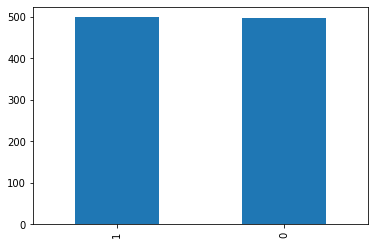

In [ ]:
df['Liked'].value_counts().plot(kind='bar')

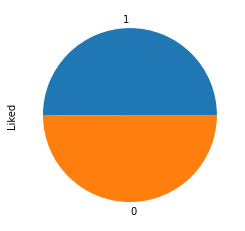

In [ ]:
df['Liked'].value_counts().plot(kind='pie')

In [ ]:
x = df['Review'].values
y = df['Liked'].values
x

In [ ]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0)
# train_test_split allots 75% of total data for training the model , 25% for testing

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer 
vect = CountVectorizer(stop_words='english') #to handle stop words like and, as, so ,etc and capture key words
x_train_vect = vect.fit_transform(x_train)
x_test_vect = vect.transform(x_test) 
x_train_vect

<747x1531 sparse matrix of type '<class 'numpy.int64'>'
	with 3646 stored elements in Compressed Sparse Row format>

In [ ]:
#METHOD 1 (using SVC and COunt Vectorizer seperately)
from sklearn.svm import SVC 
model = SVC()     #using SVC model 
model.fit(x_train_vect,y_train)# feeding model the input

SVC()

In [ ]:
y_pred = model.predict(x_test_vect) #predicting y based on x_test
y_pred

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1])

In [ ]:
from sklearn.metrics import accuracy_score #gives you the efficiency of model..higher the acc. score  , better the model
accuracy_score(y_pred,y_test)

0.7269076305220884

In [ ]:
# METHOD 2 - using pipelines 
#using svm and countvectorizers at once instead of initailizing them seperately
from sklearn.pipeline import make_pipeline 
model2 = make_pipeline(CountVectorizer(),SVC())
model2.fit(x_train,y_train)
y_pred2 = model2.predict(x_test)
accuracy_score(y_pred2,y_test)

0.8152610441767069

In [ ]:
# So , Using pipelines is better as it has beter accuracy score .


In [ ]:

from sklearn.naive_bayes import MultinomialNB
model3 = MultinomialNB()


In [ ]:
model3.fit(x_train_vect,y_train)

MultinomialNB()

In [ ]:
y_pred3 = model3.predict(x_test_vect)
y_pred3

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1])

In [ ]:
accuracy_score(y_pred3,y_test)

0.7469879518072289

In [ ]:
#another way is to combine multinomial nb() and count vectorizer at once using pipelines as we did before
model4 = make_pipeline(CountVectorizer(),MultinomialNB())

model4.fit(x_train,y_train)
y_pred4 = model4.predict(x_test)


In [ ]:
accuracy_score(y_pred4,y_test)

0.7791164658634538

In [ ]:
#using SVC() and countvectorizers using pieplines has highest accuracy scores ..so we proceed with that method
import joblib 
joblib.dump(model2,'detect positive or negative review')

['detect positive or negative review']

In [ ]:
reload_model = joblib.load('detect positive or negative review')

In [ ]:
reload_model.predict(['starters were good but desert was not good'])

array([1])

In [ ]:
reload_model.predict(['awesome taste'])


array([1])

In [ ]:
reload_model.predict(['serivce was bad but food was tasty'])

array([0])

In [ ]:
!pip install streamlit --quiet 

In [ ]:
%%writefile ReviewIdentification.py 
import streamlit as st 
import joblib
st.title("Detect whether the customer review is good or bad")

ip = st.text_input("Enter the review message here")
reload_model = joblib.load('detect positive or negative review')
op = reload_model.predict([ip])

actual = {0:'Negative Review :-(',1:'Positive Review :-)'}
if st.button('PREDICT'):
  st.title(actual[op[0]])

Overwriting ReviewIdentification.py


In [ ]:
!streamlit run ReviewIdentification.py & npx localtunnel --port 8501




2022-07-24 14:31:06.267 INFO    numexpr.utils: NumExpr defaulting to 2 threads.
npx: installed 22 in 2.865s

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://35.230.119.109:8501



In [ ]:
!streamlit run ReviewIdentification.py --server.port=80